<a href="https://colab.research.google.com/github/eddieZayed/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Author: Eddy Zayed

## Project Overview


##Load and Inspect Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

fpath = "/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()



Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

In [4]:
#1) How many rows and columns?
df.shape


(8523, 12)

In [5]:
#2) What are the datatypes of each variable?
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [6]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()



np.int64(0)

In [7]:
#drop duplicates if any
df = df.drop_duplicates()

In [8]:
#4) Identify missing values
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [9]:

#5) Address the missing values by using a placeholder value.
num_cols = df.select_dtypes("number").columns
cat_cols = df.select_dtypes("object").columns


#df[cat_cols] = df[cat_cols].fillna("MISSING")

#fill the null values with the avergae weight of each category
#df["Item_Weight"] = df["Item_Weight"].fillna( df.groupby("Item_Type")["Item_Weight"].transform("mean"))





In [10]:
#6) Confirm that there are no missing values after addressing them.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [11]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
for col in cat_cols:
  print(f"Value counts for {col} is:")
  print(df[col].value_counts())
  print("\n")

Value counts for Item_Identifier is:
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value counts for Item_Fat_Content is:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for Item_Type is:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value counts for Outlet_Identifier is:
Outlet_Identifier
OUT0

In [12]:
df['Item_Fat_Content'] = df["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg":"Regular"})
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [13]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

In [14]:
#define target and feature columns
target = "Item_Outlet_Sales"
#features
num_cols = df.select_dtypes("number").columns.drop(target)
cat_cols = df.select_dtypes("object").columns


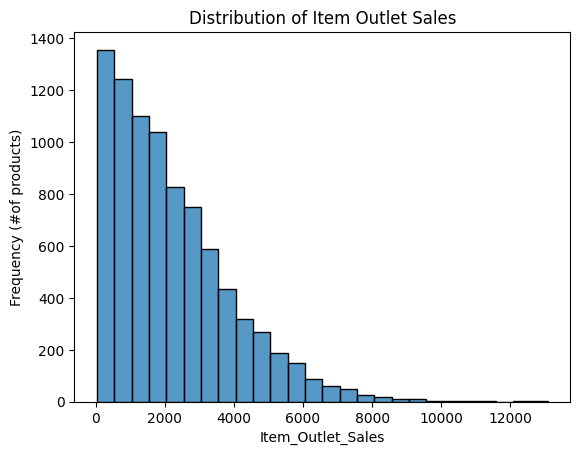

In [15]:
#understand how sales are distributed using histograms
ax = sns.histplot(data=df , x='Item_Outlet_Sales', binwidth=500)
ax.set_title("Distribution of Item Outlet Sales")
ax.set_ylabel('Frequency (#of products)');




- This histogram shows the distribution of product sales.

- The x-axis represents the sales value for each product in a store, and the y-axis shows how many products fall into each sales range.

- Most products have low sales, while only a few products generate very high sales.

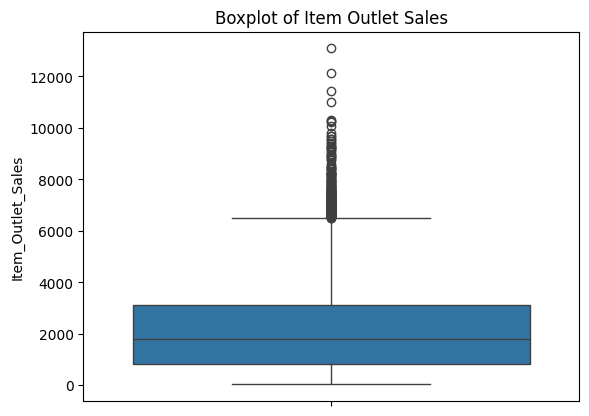

In [16]:
ax = sns.boxplot(data=df, y='Item_Outlet_Sales')
ax.set_title('Boxplot of Item Outlet Sales');

From the boxplot we can notice that:
- Median (Q2) is around 1900 -> half of the products have sales below this value (1900) and half have sales above it

- First Quartile (Q1) is around 1000 -> 25% of the products have sales below this value which means 25% of products earn less than about 1000.

-  Third Quartile (Q3) is around 3000 -> 75% of the products have sales below 3000, so only 25% of products earn more than 3000

- Interquartile Range (IQR = Q3−Q1) which contains 50% of the data, most products earn between approximately 1000 and 3000

- The lower whisker extends close to 0 because it cant be negative which is ( Q1 − 1.5 × IQR) , and the upper whisker extends to around 6500 which is (Q3+1.5×IQR). this range represents the normal spread of sales values excluding extreme cases

- The boxplot confirms that most products have low to moderate sales, with only a few products achieving very high sales values (Outliers). so the distribution is right-skewed because a small number of products sell much more than the rest.




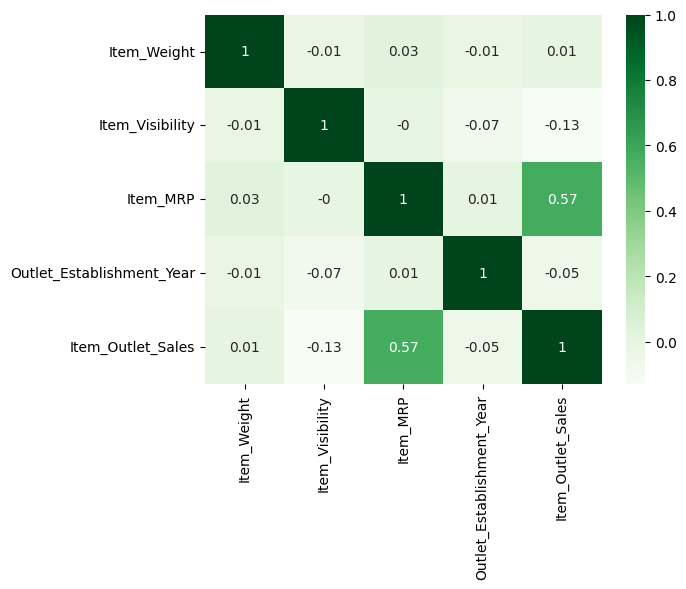

In [17]:
#Calculating Correlation Values for numeric features
corr = df.corr(numeric_only= True)
sns.heatmap(corr.round(2), cmap='Greens', annot=True);

- Item_MRP has the strongest positive correlation with Item_Outlet_Sales, indicating that higher-priced items tend to generate higher sales. All other numeric features show weak correlations with sales.

/tmp/ipython-input-3972881783.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right');


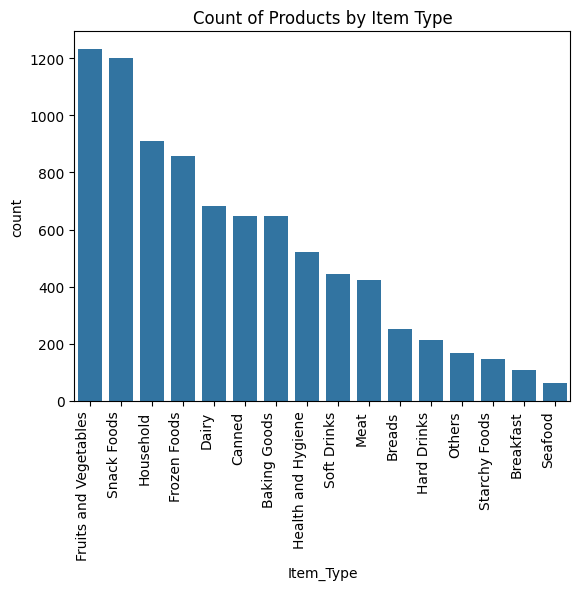

In [18]:
ax = sns.countplot(data=df, x ='Item_Type', order=df['Item_Type'].value_counts().index)
ax.set_title('Count of Products by Item Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right');

Fruits and Vegetables and Snack Foods are the most common categories, while Seafood and Breakfast appear the least frequently.

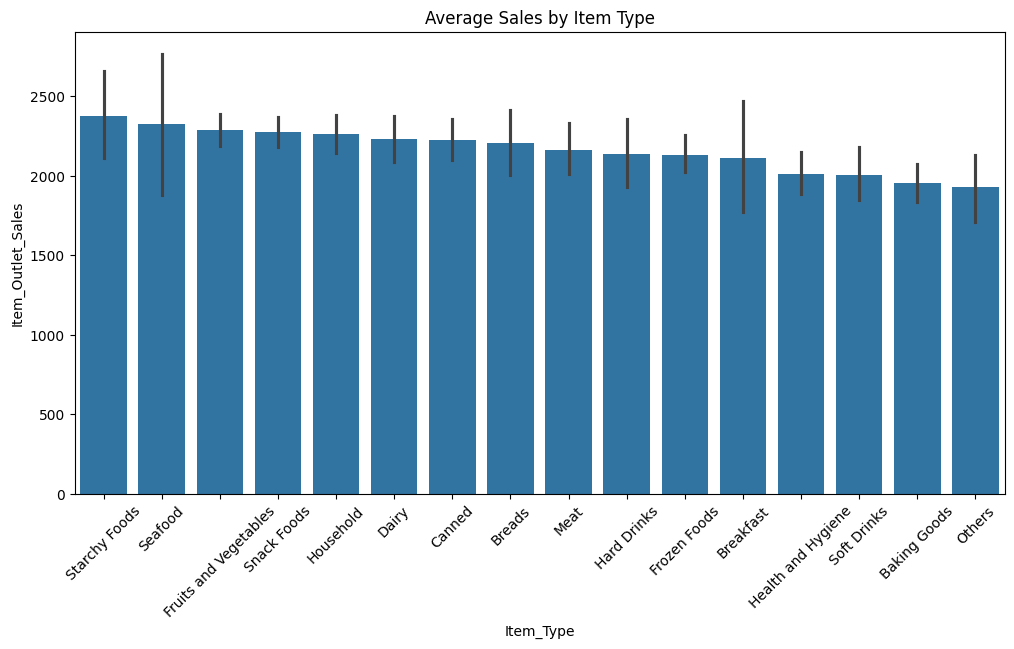

In [19]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=df, x="Item_Type", y="Item_Outlet_Sales", order=df.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).index)
ax.set_title('Average Sales by Item Type')
plt.xticks(rotation=45);

- Although some item types have slightly higher average sales than others, the differences between most categories are relatively small. This suggests that no single item type strongly dominates sales, and average sales are fairly consistent across different product categories.

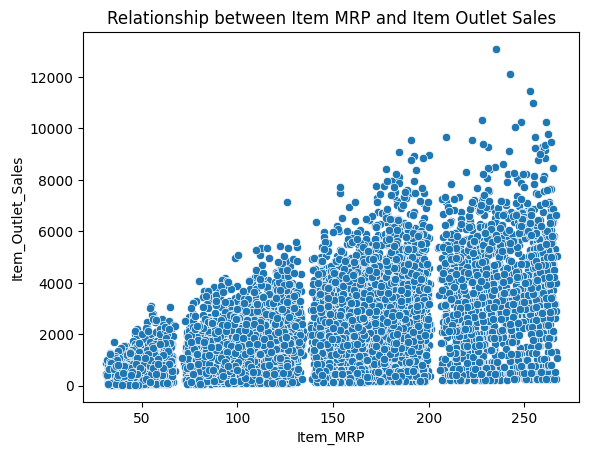

In [20]:
ax = sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')
ax.set_title('Relationship between Item MRP and Item Outlet Sales');

The scatter plot shows a strong positive relationship between Item_MRP and Item_Outlet_Sales, indicating that higher-priced items generally generate higher sales, although sales vary across outlets.

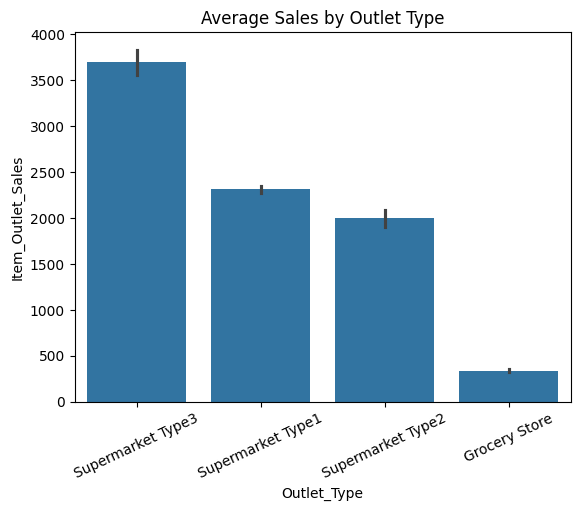

In [21]:
ax = sns.barplot( data=df, x='Outlet_Type', y='Item_Outlet_Sales', order=df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).index)
ax.set_title('Average Sales by Outlet Type')
plt.xticks(rotation=25);



- The bar plot shows that supermarket outlets generate significantly higher average sales than grocery stores, indicating that outlet type plays an important role in sales performance.

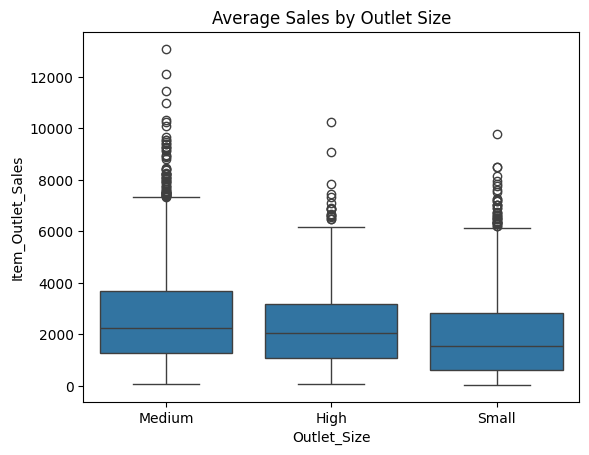

In [22]:
ax = sns.boxplot( data=df ,  x = 'Outlet_Size', y='Item_Outlet_Sales', order=df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False).index)
ax.set_title('Average Sales by Outlet Size');

- The boxplot shows that medium and high-sized outlets tend to have higher sales distributions than small outlets. Across all outlet sizes

##Project 1 - Part 4 (Features Inspection)

In a previous part of this project (Week 2), placeholder values were used to temporarily handle missing data for exploration and visualization purposes.

For Part 4 (Feature Inspection), these placeholder replacements have been commented out, allowing the original null values to appear again in the dataset.

This ensures that missing values and their frequencies are accurately reported during Exploratory Data Analysis.

##explore_categorical function

In [23]:
def explore_categorical(df, x, fillna=True, placeholder="MISSING",
                        figsize=(6,4), order=None):

    temp_df = df.copy()

    # Missing value stats (before filling)
    null_count = temp_df[x].isna().sum()
    null_perc = null_count / len(temp_df) * 100

    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=temp_df, x=x, ax=ax, order=order)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(f"Column: {x}")
    fig.tight_layout()
    plt.show()

    # Print stats
    print(f"- NaN's Found: {null_count} ({round(null_perc, 2)}%)")

    nunique = temp_df[x].nunique()
    print(f"- Unique Values: {nunique}")

    # Most common value
    val_counts = temp_df[x].value_counts(dropna=False)
    most_common_val = val_counts.index[0]
    freq = val_counts.values[0]
    perc_most_common = freq / len(temp_df) * 100

    print(
        f"- Most common value: '{most_common_val}' occurs "
        f"{freq} times ({round(perc_most_common, 2)}%)"
    )

    # Constant / quasi-constant check
    if perc_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is constant or quasi-constant and should be dropped.")
    else:
        print(f"- '{x}' is not constant or quasi-constant.")

    return fig, ax


##plot_categorical_vs_target function

In [24]:
def plot_categorical_vs_target(df, x, y="Item_Outlet_Sales",
                               figsize=(6, 4),
                               fillna=True, placeholder="MISSING",
                               order=None):
    temp_df = df.copy()

    # handle missing values in x
    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)
    else:
        temp_df = temp_df.dropna(subset=[x])

    fig, ax = plt.subplots(figsize=figsize)

    # barplot (mean target per category)
    sns.barplot(
        data=temp_df, x=x, y=y, ax=ax, order=order,
        alpha=0.6, linewidth=1, edgecolor="black", errorbar=None
    )

    # stripplot (individual values)
    sns.stripplot(
        data=temp_df, x=x, y=y, hue=x, ax=ax,
        order=order, hue_order=order,
        legend=False, edgecolor="white", linewidth=0.5,
        size=3, zorder=0
    )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(f"{x} vs {y}")
    fig.tight_layout()

    return fig, ax


## explore_numeric function

In [25]:
def explore_numeric(df, x, figsize=(6,5)):
    gridspec = {"height_ratios": [0.7, 0.3]}
    fig, ax = plt.subplots(nrows=2, figsize=figsize, sharex=True, gridspec_kw=gridspec)

    sns.histplot(data=df, x=x, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])

    ax[0].set_title(f"Column: {x}", fontweight="bold")
    fig.tight_layout()
    plt.show()

    # Missing value info
    null_count = df[x].isna().sum()
    null_perc = null_count / len(df) * 100
    print(f"- NaN's Found: {null_count} ({round(null_perc, 2)}%)")

    # Cardinality (unique values)
    nunique = df[x].nunique()
    print(f"- Unique Values: {nunique}")

    # Most common value + quasi-constant check
    val_counts = df[x].value_counts(dropna=False)
    most_common_val = val_counts.index[0]
    freq = val_counts.values[0]
    perc_most_common = freq / len(df) * 100
    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%)")

    if perc_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is constant or quasi-constant and should be dropped.")
    else:
        print("- Not constant or quasi-constant.")

    return fig, ax


##plot_numeric_vs_target function

In [31]:
def plot_numeric_vs_target(df,x,y="Item_Outlet_Sales",figsize=(6,4), **kwargs):
  corr = df[[x,y]].corr().round(2) #return a matrix
  r = corr.loc[x,y]

  fig,ax = plt.subplots(figsize=figsize)

  scatter_kws = {"ec":"white","alpha":0.5}
  sns.regplot(data=df,x=x,y=y,ax=ax,scatter_kws=scatter_kws,**kwargs)

  ax.set_title(f"{x} VS {y} (r={r})")
  plt.show()
  return fig,ax



##1)Inspecting Feature 1 (Item_Weight)
Item_Weight: Weight of product

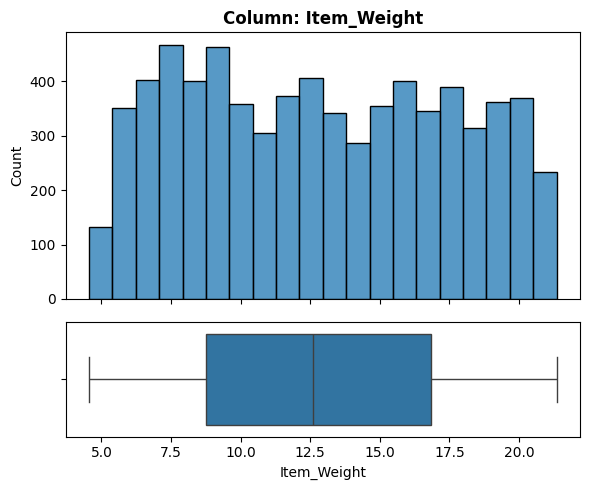

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [29]:
explore_numeric(df,"Item_Weight");

Feature Observations

Feature type: Numeric

Null values: 1463 null values (≈17.17%).
These values should not be dropped due to the large percentage. A reasonable approach later would be imputation (ex: mean or median)

Constant or quasi-constant: No.

Cardinality: High (numeric feature, many unique values).

Known before target is determined? Yes.

Business reason to exclude? No. Item weight is a meaningful product attribute.

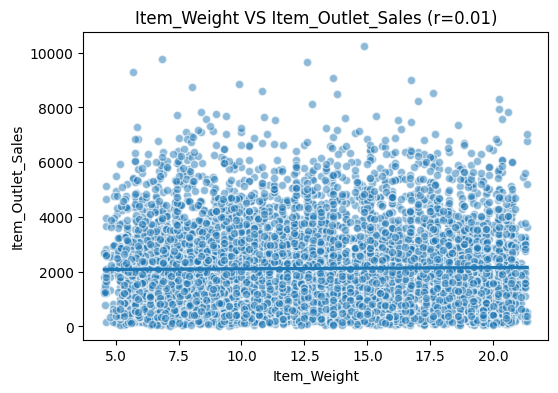

In [32]:
plot_numeric_vs_target(df,'Item_Weight');

Feature vs Target Observations

Based on business understanding, would you expect this feature to be a predictor of the target?
Possibly, since heavier products may be associated with higher prices or sales in some cases.

Does this feature appear to be a predictor of the target?
No. The correlation is very weak (r = 0.01), and the scatter plot shows no clear relationship between item weight and item outlet sales.

##2)Inspecting Feature 2 (Item_Fat_Content)
Item_Fat_Content: Whether the product is low-fat or regular

/tmp/ipython-input-1637959361.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


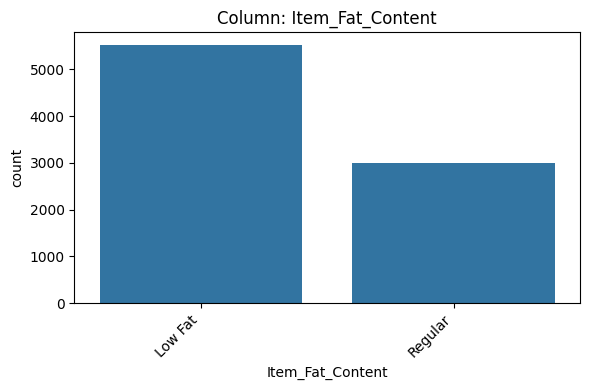

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- 'Item_Fat_Content' is not constant or quasi-constant.


In [35]:
explore_categorical(df,"Item_Fat_Content",fillna=False);

Feature Observations

Feature type: Categorical (nominal)

Null values: 0 null values (0%). No imputation is needed.

Constant or quasi-constant? No. The most common category represents about 64.7% of the data, which is below the quasi-constant threshold.

Cardinality: Low (2 categories).

Known before the target is determined? Yes.

Business reason to exclude? No. Fat content is a meaningful product characteristic.

/tmp/ipython-input-3476824361.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


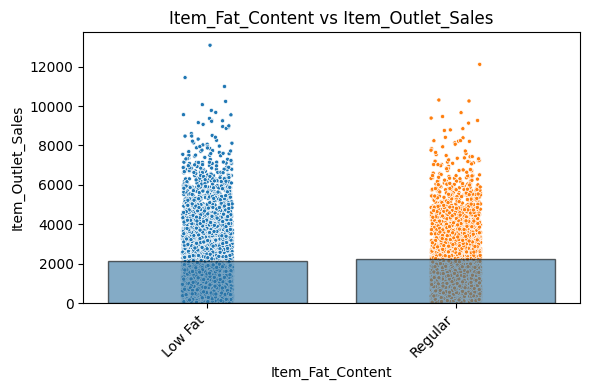

In [37]:
plot_categorical_vs_target(df,'Item_Fat_Content',fillna=False);

Feature vs Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, customer preferences may affect sales.

Does this feature appear to be a predictor of the target?
Weakly, as there is a lot of overlap between the categories.

##3)Inspecting Feature 3 (Item_Visibility)
Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

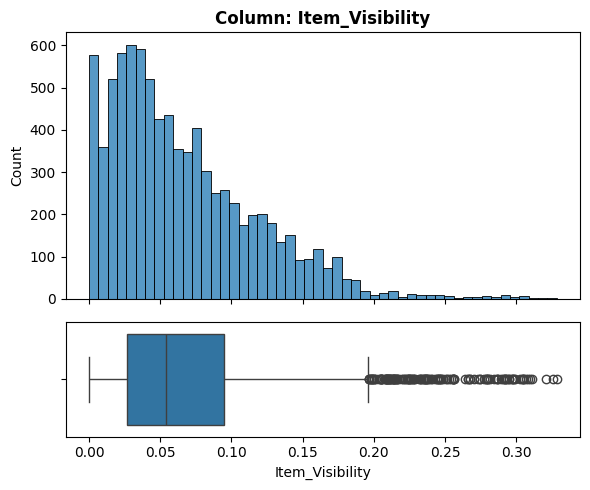

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [38]:
explore_numeric(df,"Item_Visibility");

Feature Observations

What type of feature is it?
Numeric.

How many null values? What percentage? What would you do with them?
0 null values (0%). No action needed.

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
High. This is a numeric feature with many unique values.

Would we know this feature before the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
No. Item visibility is a meaningful retail-related feature.

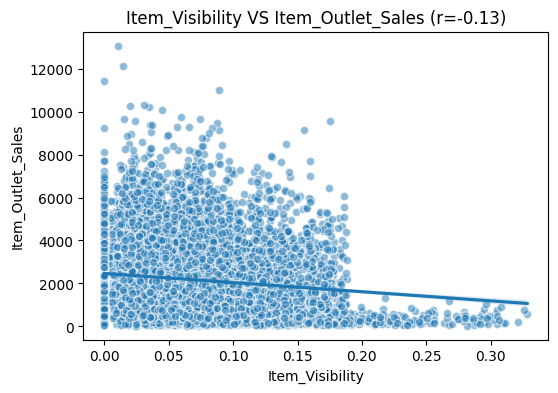

In [39]:
plot_numeric_vs_target(df,'Item_Visibility');

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, product visibility may affect how likely an item is to be purchased.

Does this feature appear to be a predictor of the target?
Weakly and negatively, as higher visibility is slightly associated with lower sales and there is a lot of spread in the data.

##4)Inspecting Feature 4 (Item_Type)
Item_Type: The category to which the product belongs

/tmp/ipython-input-1637959361.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


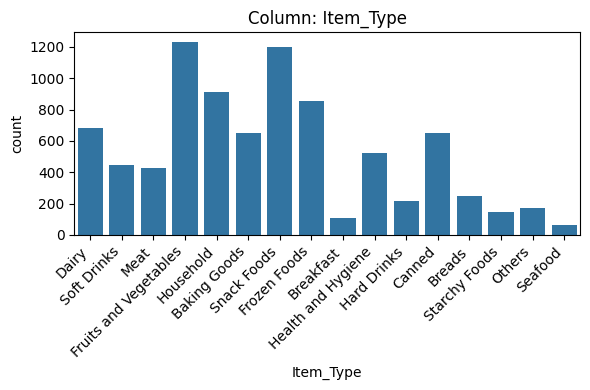

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- 'Item_Type' is not constant or quasi-constant.


In [40]:
explore_categorical(df,"Item_Type",fillna=False);

Feature Observations

What type of feature is it?
Categorical (nominal).

How many null values? What percentage? What would you do with them?
0 null values (0%). No action needed.

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
Yes. There are 16 unique categories, which is considered high cardinality.

Would we know this feature before the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
Possibly. Item type cannot be changed by the retailer, but it may still be useful for prediction.

/tmp/ipython-input-3476824361.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


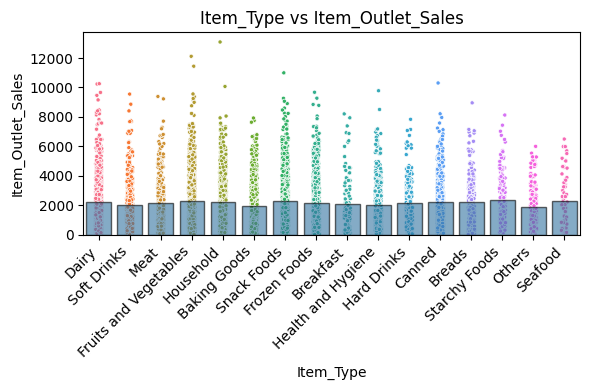

In [41]:
plot_categorical_vs_target(df,'Item_Type',fillna=False);

Feature vs Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, different product categories may influence sales.

Does this feature appear to be a predictor of the target?
Weakly. The average sales across item types are very similar, and there is a large overlap between categories.

##5)Inspecting Feature 5 (Item_MRP)
Item_MRP: Maximum Retail Price (list price) of the product

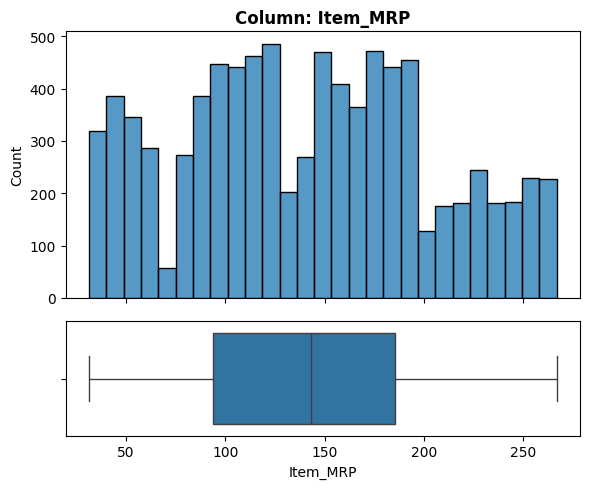

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [42]:
explore_numeric(df,"Item_MRP");

Feature Observations

What type of feature is it?
Numeric.

How many null values? What percentage? What would you do with them?
0 null values (0%). No action needed.

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
High. This numeric feature has many unique values.

Would we know this feature before the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
No. Item_MRP represents the product price and is an important feature.

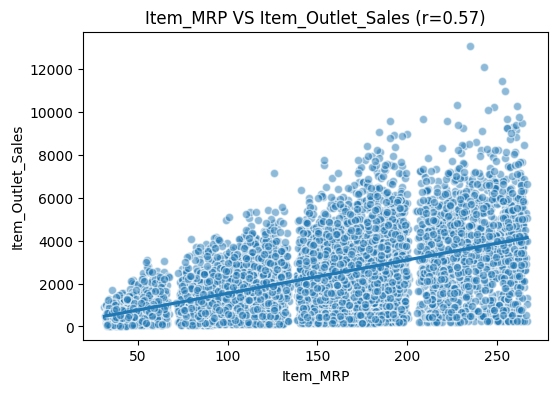

In [43]:
plot_numeric_vs_target(df,'Item_MRP');

Feature vs Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, higher-priced items are expected to generate higher sales.

Does this feature appear to be a predictor of the target?
Yes, there is a clear positive relationship between Item_MRP and Item_Outlet_Sales.

##6)Inspecting Feature 6 (Outlet_Identifier)
Outlet_Identifier: Store ID

/tmp/ipython-input-1637959361.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


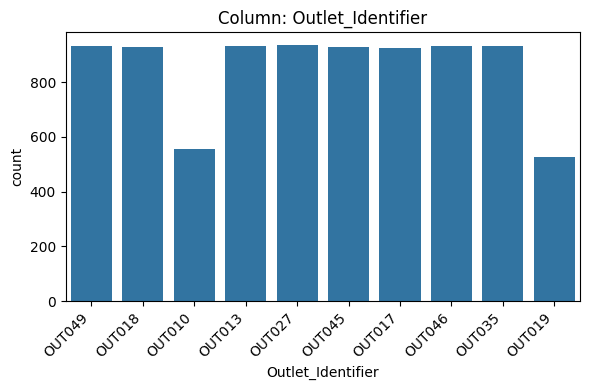

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- 'Outlet_Identifier' is not constant or quasi-constant.


In [44]:
explore_categorical(df,"Outlet_Identifier",fillna=False);

Feature Inspection Questions

What type of feature is it?
Categorical (nominal)

How many null values? What percentage?
0 null values (0%)

What would you do with the null values?
No action needed.

Is the feature constant or quasi-constant?
No, it is not constant or quasi-constant.

What is the cardinality? Is it high (>10)?
Cardinality = 10 (not high).

Would we know this feature before the target is determined?
Yes, outlet IDs are known beforehand.

Is there a business case reason to exclude it?
Yes. It is an identifier, not a meaningful business feature.

/tmp/ipython-input-3476824361.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


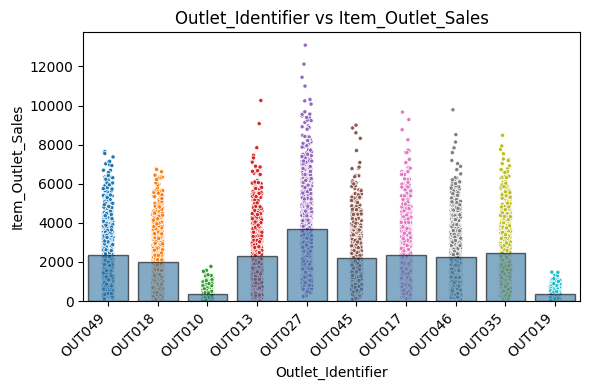

In [45]:
plot_categorical_vs_target(df,'Outlet_Identifier',fillna=False);

Feature vs Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?
No, it is only an outlet ID and has no business meaning by itself.

Does this feature appear to be a predictor of the target?
No, the differences reflect individual outlet behavior, not a general or learnable pattern.

##7)Inspecting Feature 7 (Outlet_Establishment_Year)
Outlet_Establishment_Year: The year in which store was established

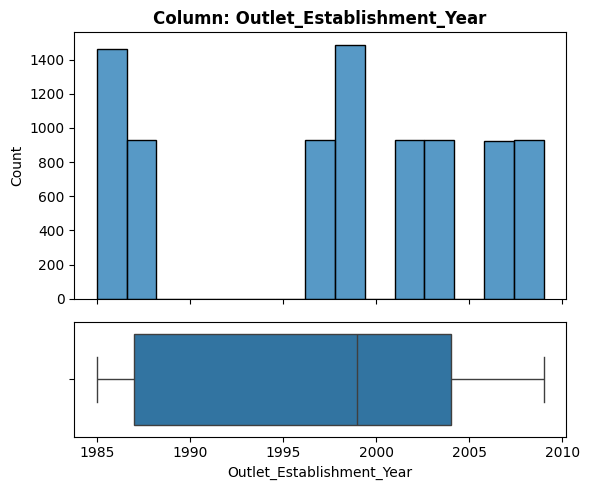

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [46]:
explore_numeric(df,"Outlet_Establishment_Year");

Feature Inspection Questions

What type of feature is it?
Numeric

How many null values? What percentage?
0 null values (0%)

What would you do with the null values?
No action needed.

Is the feature constant or quasi-constant?
No, it is not constant or quasi-constant.

What is the cardinality? Is it high (>10)?
Cardinality = 9 (not high).

Would we know this feature before the target is determined?
Yes, the outlet’s establishment year is known beforehand.

Is there a business case reason to exclude it?
No, it represents outlet age, which is meaningful.

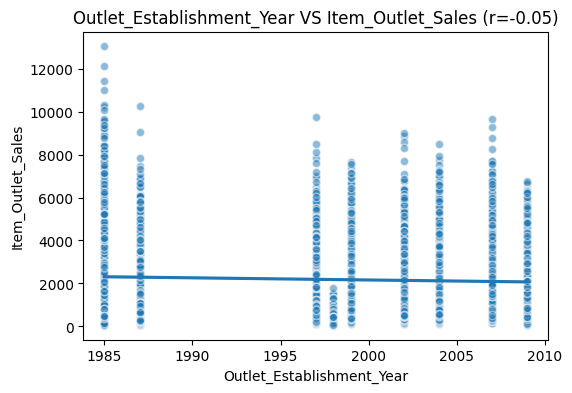

In [47]:
plot_numeric_vs_target(df,'Outlet_Establishment_Year');

Feature vs Target Observations

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, outlet age could influence sales due to experience and customer base.

Does this feature appear to be a predictor of the target?
No, the relationship is very weak, and sales largely overlap across establishment years.

##8)Inspecting Feature 8 (Outlet_Size)
Outlet_Size: The size of the store in terms of ground area covered

/tmp/ipython-input-1637959361.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


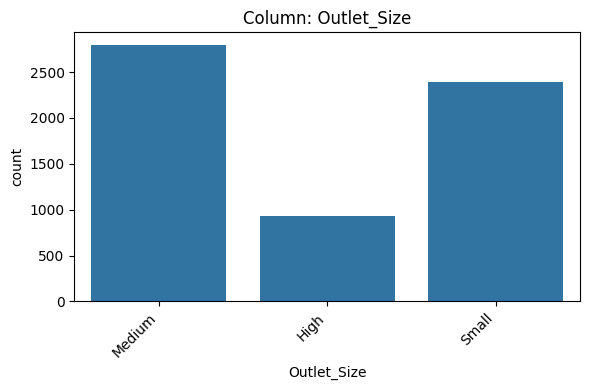

- NaN's Found: 2410 (28.28%)
- Unique Values: 3
- Most common value: 'Medium' occurs 2793 times (32.77%)
- 'Outlet_Size' is not constant or quasi-constant.


In [48]:
explore_categorical(df,"Outlet_Size",fillna=False);

Feature Inspection

What type of feature is it?
Categorical (ordinal: Small, Medium, High).

How many null values? What percentage? What would you do with them?
2410 null values (28.28%).
I would impute using the most frequent category

Is the feature constant or quasi-constant?
No, it has three meaningful categories.

What is the cardinality? Is it high (>10)?
Cardinality is 3, which is low.

Would we know this feature before the target is determined?
Yes, outlet size is known before sales occur.

Is there a business case reason to exclude it?
No, outlet size reflects store capacity and is business-relevant.

/tmp/ipython-input-3476824361.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


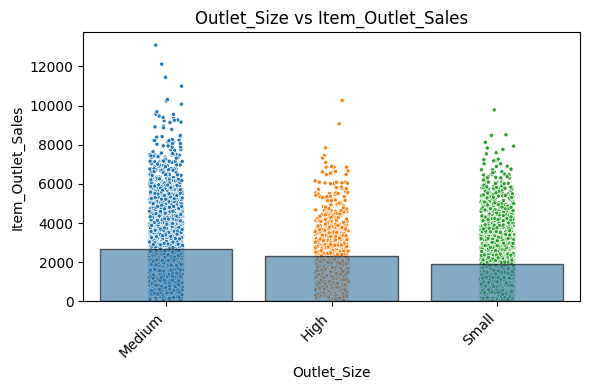

In [49]:
plot_categorical_vs_target(df,'Outlet_Size',fillna=False);

Feature vs Target Observations (Outlet_Size)

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, outlet size may affect sales because larger stores can carry more products and serve more customers.

Does this feature appear to be a predictor of the target?
Yes, moderately. Medium outlets show higher average sales, while Small outlets tend to have lower sales, though there is still overlap between groups.

##9)Inspecting Feature 9 (Outlet_Location_Type)
Outlet_Location_Type: The type of area in which the store is located

/tmp/ipython-input-1637959361.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


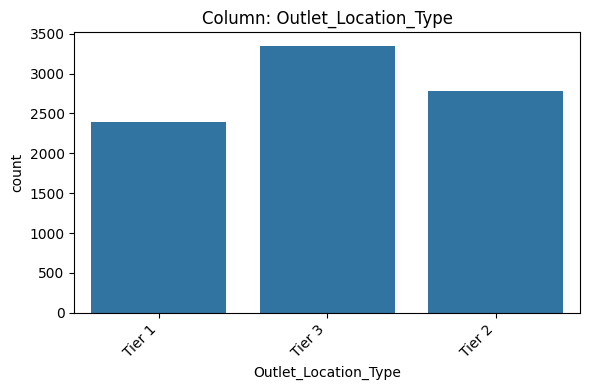

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- 'Outlet_Location_Type' is not constant or quasi-constant.


In [51]:
explore_categorical(df,"Outlet_Location_Type",fillna=False);

Feature Inspection:

What type of feature is it?
Categorical (ordinal: Tier 1, Tier 2, Tier 3).

How many null values? What percentage? What would you do with them?
0 null values (0%).
No action needed.

Is the feature constant or quasi-constant?
No, values are well distributed.

What is the cardinality? Is it high (>10)?
Cardinality is 3, which is low.

Would we know this feature before the target is determined?
Yes, outlet location is known before sales occur.

Is there a business case reason to exclude it?
No, location reflects market size and customer demand.

/tmp/ipython-input-3476824361.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


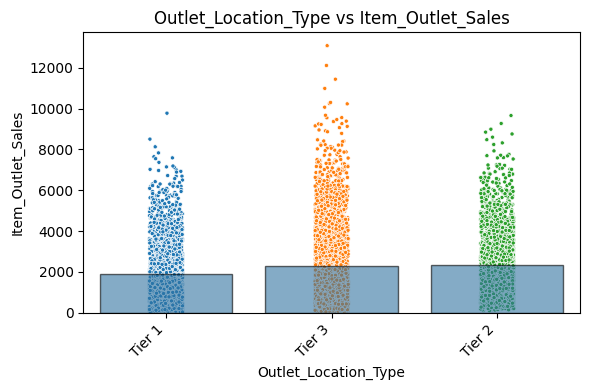

In [52]:
plot_categorical_vs_target(df,'Outlet_Location_Type',fillna=False);

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, outlets in different location tiers may have different sales levels.

Does this feature appear to be a predictor of the target?
Yes, moderately. Tier 3 outlets show higher average sales, while Tier 1 tends to be lower, though overlap exists.

##10)Inspecting Feature 10 (Outlet_Type)
Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket

/tmp/ipython-input-1637959361.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


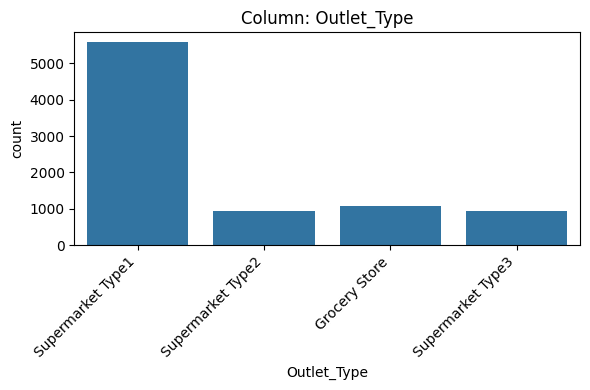

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- 'Outlet_Type' is not constant or quasi-constant.


In [53]:
explore_categorical(df,"Outlet_Type",fillna=False);

Feature Inspection

What type of feature is it?
Categorical (nominal).

How many null values? What percentage? What would you do with them?
0 null values (0%).
No action needed.

Is the feature constant or quasi-constant?
No, it has multiple outlet types with meaningful variation.

What is the cardinality? Is it high (>10)?
Cardinality is 4, which is low.

Would we know this feature before the target is determined?
Yes, outlet type is known before sales occur.

Is there a business case reason to exclude it?
No, outlet type represents store format, which is business-relevant.

/tmp/ipython-input-3476824361.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


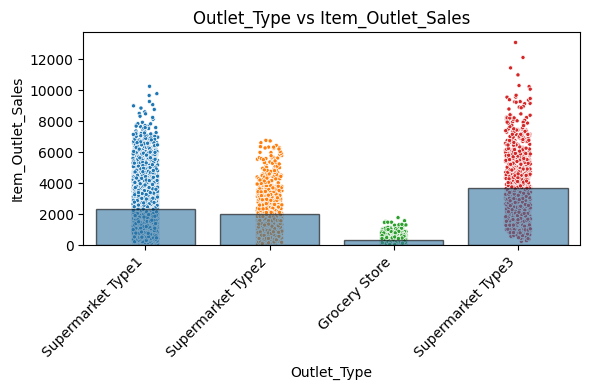

In [54]:
plot_categorical_vs_target(df,'Outlet_Type',fillna=False);

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, different outlet types are expected to generate different sales volumes.

Does this feature appear to be a predictor of the target?
Yes, clearly. Supermarket Type3 shows much higher sales, while Grocery Stores have much lower sales.